In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, lars_path


In [3]:
df = pd.read_csv('clean_drop1.csv')

In [4]:
#select features with highest corr
df.head()

,Raceeth_2.0,Raceeth_3.0,Raceeth_4.0,Raceeth_5.0,Raceeth_6.0,Raceeth_7.0,Raceeth_8.0,Gender_2.0,Bullying_at_school_2.0,Electronic_bullying_2.0,...,Concussion,Sleep,Grades_in_school,Sports_drinks,Plain_water,Muscle_strengthening,Indoor_tanning,Sunscreen,How_well_speak_English,Tried_weed
0,0,0,0,0,0,1,0,1,1,1,...,2.0,4.0,2.0,2.0,6.0,5.0,1.0,1.0,1.0,0.0
1,0,0,0,0,0,0,1,1,0,1,...,1.0,4.0,2.0,1.0,7.0,6.0,1.0,1.0,1.0,1.0
2,0,0,0,0,0,0,1,0,1,1,...,1.0,5.0,2.0,1.0,5.0,1.0,1.0,3.0,1.0,0.0
3,0,0,0,1,0,0,0,1,1,1,...,1.0,4.0,3.0,1.0,6.0,1.0,1.0,3.0,1.0,1.0
4,0,0,0,0,1,0,0,1,1,1,...,1.0,2.0,1.0,3.0,6.0,2.0,1.0,3.0,2.0,0.0


In [5]:
df_open = df[['Gender_2.0','Asthma_2.0','Asthma_3.0','Food_allergies_2.0','Food_allergies_3.0','Difficulty_concentrating_2.0',
        'Oral_health_care_2.0','Oral_health_care_3.0','Oral_health_care_4.0','Oral_health_care_5.0','Weight_loss_2.0','Weight_loss_3.0','Weight_loss_4.0',
        'Grade','Perception_of_weight','Fruit_juice_drinking','Fruit_eating','Green_salad_eating','Potato_eating','Carrot_eating','Other_vegetable_eating','No_soda_drinking','No_milk_drinking','Breakfast_eating','Physical_activity_>=_5_days','Television_watching',
        'Seat_belt_use','Computer_use','PE_attendance','Sports_team_participation','Concussion','Sleep','Grades_in_school','Sports_drinks','Plain_water','Muscle_strengthening','Indoor_tanning','Sunscreen','How_well_speak_English','Tried_weed']]


In [6]:
corr_matrix = df_open.corr()
corr_matrix

,Gender_2.0,Asthma_2.0,Asthma_3.0,Food_allergies_2.0,Food_allergies_3.0,Difficulty_concentrating_2.0,Oral_health_care_2.0,Oral_health_care_3.0,Oral_health_care_4.0,Oral_health_care_5.0,...,Concussion,Sleep,Grades_in_school,Sports_drinks,Plain_water,Muscle_strengthening,Indoor_tanning,Sunscreen,How_well_speak_English,Tried_weed
Gender_2.0,1.000000,-0.014760,0.003655,0.079309,-0.016078,0.128981,0.002835,0.008386,0.034613,0.021711,...,0.062763,0.050508,0.109757,0.152551,-0.030032,0.190403,-0.035029,-0.161486,0.063252,0.000698
Asthma_2.0,-0.014760,1.000000,-0.363825,0.106865,-0.021368,0.082860,0.013002,-0.014551,0.011773,-0.026135,...,-0.065387,0.075700,-0.044070,-0.020865,0.022317,0.022129,-0.036283,0.014477,-0.036473,-0.034864
Asthma_3.0,0.003655,-0.363825,1.000000,-0.046648,0.054255,-0.038683,0.022163,0.020452,0.016767,0.087627,...,0.070142,-0.020809,0.085246,0.034646,-0.038864,-0.012731,0.070299,-0.003763,0.099495,0.008592
Food_allergies_2.0,0.079309,0.106865,-0.046648,1.000000,-0.593620,0.238478,0.024989,-0.004324,-0.001066,-0.020342,...,-0.046464,0.057450,-0.015374,-0.033827,-0.038624,-0.003010,-0.051534,-0.001034,-0.053071,0.003757
Food_allergies_3.0,-0.016078,-0.021368,0.054255,-0.593620,1.000000,-0.129807,-0.005282,0.005988,0.027106,0.058249,...,0.023312,-0.016645,0.048780,0.041078,0.001870,-0.015181,0.022110,-0.019388,0.084880,-0.020043
Difficulty_concentrating_2.0,0.128981,0.082860,-0.038683,0.238478,-0.129807,1.000000,-0.009063,-0.058340,-0.011291,-0.040451,...,-0.051268,0.183741,-0.145571,-0.011641,0.016788,0.101998,-0.047820,0.049404,-0.062626,-0.164226
Oral_health_care_2.0,0.002835,0.013002,0.022163,0.024989,-0.005282,-0.009063,1.000000,-0.083415,-0.051590,-0.101242,...,0.029897,-0.051694,0.098076,0.009493,-0.043927,-0.037047,-0.006740,-0.057057,0.021008,0.030982
Oral_health_care_3.0,0.008386,-0.014551,0.020452,-0.004324,0.005988,-0.058340,-0.083415,1.000000,-0.028066,-0.055078,...,0.033474,-0.043124,0.061880,0.005107,-0.024675,-0.043702,0.006057,-0.056426,0.019802,0.045125
Oral_health_care_4.0,0.034613,0.011773,0.016767,-0.001066,0.027106,-0.011291,-0.051590,-0.028066,1.000000,-0.034064,...,0.068819,-0.029564,0.080604,0.021198,-0.087106,-0.042590,0.109563,-0.065573,0.105512,0.005683
Oral_health_care_5.0,0.021711,-0.026135,0.087627,-0.020342,0.058249,-0.040451,-0.101242,-0.055078,-0.034064,1.000000,...,0.042275,0.001037,0.133073,0.019794,-0.062127,-0.039263,0.018607,-0.063762,0.101664,-0.021321


In [7]:
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort")
print (so)

Food_allergies_3.0  Food_allergies_2.0   -0.593620
Food_allergies_2.0  Food_allergies_3.0   -0.593620
Asthma_3.0          Asthma_2.0           -0.363825
Asthma_2.0          Asthma_3.0           -0.363825
Weight_loss_3.0     Weight_loss_2.0      -0.304971
                                            ...   
Breakfast_eating    Breakfast_eating      1.000000
No_milk_drinking    No_milk_drinking      1.000000
No_soda_drinking    No_soda_drinking      1.000000
PE_attendance       PE_attendance         1.000000
Tried_weed          Tried_weed            1.000000
Length: 1600, dtype: float64


In [8]:
so.to_csv('so_open.csv') 

In [9]:
lasso_model = Lasso(alpha = 0.05)    
selected_columns = list(df_open.columns)
lasso_model.fit(df_open.iloc[:, :-1], df_open.iloc[:, -1])
list(zip(selected_columns, lasso_model.coef_))

[('Gender_2.0', -0.0),
 ('Asthma_2.0', -0.0),
 ('Asthma_3.0', 0.0),
 ('Food_allergies_2.0', 0.0),
 ('Food_allergies_3.0', -0.0),
 ('Difficulty_concentrating_2.0', -0.0),
 ('Oral_health_care_2.0', 0.0),
 ('Oral_health_care_3.0', 0.0),
 ('Oral_health_care_4.0', -0.0),
 ('Oral_health_care_5.0', -0.0),
 ('Weight_loss_2.0', 0.0),
 ('Weight_loss_3.0', -0.0),
 ('Weight_loss_4.0', -0.0),
 ('Grade', 0.04251740906201885),
 ('Perception_of_weight', 0.0),
 ('Fruit_juice_drinking', 0.0018472157670284207),
 ('Fruit_eating', 0.0),
 ('Green_salad_eating', 0.0),
 ('Potato_eating', 0.0),
 ('Carrot_eating', 0.0),
 ('Other_vegetable_eating', -0.0),
 ('No_soda_drinking', 0.0008235354937242878),
 ('No_milk_drinking', -0.0),
 ('Breakfast_eating', -0.020286989093171188),
 ('Physical_activity_>=_5_days', 0.0),
 ('Television_watching', 0.0),
 ('Seat_belt_use', -0.024996371178656912),
 ('Computer_use', 0.0),
 ('PE_attendance', 0.0),
 ('Sports_team_participation', 0.0),
 ('Concussion', 0.0),
 ('Sleep', -0.0),
 ('

In [10]:
X = df_open[[ 'Grade','Seat_belt_use', 'Breakfast_eating','Sports_drinks', 'Grades_in_school', 
             'Fruit_juice_drinking', 'No_soda_drinking']]

y = df_open.iloc[:, -1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### KNN using RandomizedSearchCV

In [13]:
# define the parameter values that should be searched
k_range = list(range(63, 75))
weight_options = ['uniform', 'distance']

In [14]:
knn = KNeighborsClassifier()

In [15]:

# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [16]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='roc_auc', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.701202,0.016668,"{'weights': 'uniform', 'n_neighbors': 73}"
1,0.698753,0.016302,"{'weights': 'uniform', 'n_neighbors': 64}"
2,0.666524,0.013350,"{'weights': 'distance', 'n_neighbors': 71}"
3,0.700898,0.016334,"{'weights': 'uniform', 'n_neighbors': 72}"
4,0.666303,0.013278,"{'weights': 'distance', 'n_neighbors': 72}"
5,0.666398,0.013355,"{'weights': 'distance', 'n_neighbors': 74}"
6,0.666201,0.013447,"{'weights': 'distance', 'n_neighbors': 69}"
7,0.700220,0.016271,"{'weights': 'uniform', 'n_neighbors': 68}"
8,0.665877,0.013455,"{'weights': 'distance', 'n_neighbors': 65}"
9,0.665615,0.013559,"{'weights': 'distance', 'n_neighbors': 63}"


In [17]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.7012023396688993
{'weights': 'uniform', 'n_neighbors': 73}


In [18]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=64, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=64)

In [19]:
# make a prediction on out-of-sample data
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1414  210]
 [ 661  365]]


0.6713207547169812

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.87      0.76      1624
         1.0       0.63      0.36      0.46      1026

    accuracy                           0.67      2650
   macro avg       0.66      0.61      0.61      2650
weighted avg       0.66      0.67      0.65      2650



### Logistic Regression using RandomizedSearchCV

In [21]:
# define the parameter values that should be searched
solver_options =['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty_options = ['l1', 'l2']
iter_range = [100,200,300]
#k_range = list(range(1, 31))
#weight_options = ['uniform', 'distance']

In [22]:
logr =LogisticRegression(random_state = 0)

In [23]:
#penalty = penalty_options
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(solver=solver_options , max_iter=iter_range, penalty = penalty_options)

In [24]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(logr, param_dist, cv=10, scoring='accuracy', n_iter=30, random_state=5, return_train_score=False, n_jobs= -1)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,NaN,NaN,"{'solver': 'newton-cg', 'penalty': 'l1', 'max_..."
1,NaN,NaN,"{'solver': 'lbfgs', 'penalty': 'l1', 'max_iter..."
2,0.660438,0.010061,"{'solver': 'liblinear', 'penalty': 'l1', 'max_..."
3,NaN,NaN,"{'solver': 'sag', 'penalty': 'l1', 'max_iter':..."
4,0.660721,0.010331,"{'solver': 'saga', 'penalty': 'l1', 'max_iter'..."
5,0.660627,0.010026,"{'solver': 'newton-cg', 'penalty': 'l2', 'max_..."
6,0.660627,0.010026,"{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter..."
7,0.660627,0.010026,"{'solver': 'liblinear', 'penalty': 'l2', 'max_..."
8,0.660627,0.010026,"{'solver': 'sag', 'penalty': 'l2', 'max_iter':..."
9,0.660627,0.010026,"{'solver': 'saga', 'penalty': 'l2', 'max_iter'..."


In [25]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.6607206870133803
{'solver': 'saga', 'penalty': 'l1', 'max_iter': 100}


In [26]:
# train your model using all data and the best known parameters
logr = LogisticRegression(solver= 'liblinear')
logr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [27]:
# make a prediction on out-of-sample data
y_pred = logr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1433  191]
 [ 661  365]]


0.6784905660377358

In [28]:
print(classification_report(y_test, y_pred)) #this is worse than simple

              precision    recall  f1-score   support

         0.0       0.68      0.88      0.77      1624
         1.0       0.66      0.36      0.46      1026

    accuracy                           0.68      2650
   macro avg       0.67      0.62      0.62      2650
weighted avg       0.67      0.68      0.65      2650



### SVC using RandomizedSearchCV

In [29]:
# define the parameter values that should be searched
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
#solver_options =['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#penalty_options = ['l1', 'l2']
#iter_range = [100,200,300]
#k_range = list(range(1, 31))
#weight_options = ['uniform', 'distance']

In [30]:
svcr =SVC(random_state = 0)

In [31]:
#penalty = penalty_options
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(kernel=kernel_options)

In [32]:
# n_iter controls the number of searches #'accuracy'  'roc_auc'
rand = RandomizedSearchCV(svcr, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False, n_jobs= -1)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]  

C:\Users\sabri\miniconda3\envs\metis\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


,mean_test_score,std_test_score,params
0,0.655249,0.007265,{'kernel': 'linear'}
1,0.639771,0.005188,{'kernel': 'poly'}
2,0.667611,0.012013,{'kernel': 'rbf'}
3,0.573327,0.012373,{'kernel': 'sigmoid'}


In [33]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.6676106864788783
{'kernel': 'rbf'}


In [34]:
# train your model using all data and the best known parameters
svcr =SVC(random_state = 0, kernel='rbf')
svcr.fit(X_train, y_train)

SVC(random_state=0)

In [35]:
# make a prediction on out-of-sample data
y_pred = svcr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1481  143]
 [ 693  333]]


0.6845283018867925

In [36]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

         0.0       0.68      0.91      0.78      1624
         1.0       0.70      0.32      0.44      1026

    accuracy                           0.68      2650
   macro avg       0.69      0.62      0.61      2650
weighted avg       0.69      0.68      0.65      2650



### Random Forest using RandomizedSearchCV

In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion_options =['gini','entropy']

In [38]:
rf= RandomForestClassifier(random_state = 0)

In [39]:
#penalty = penalty_options
# specify "parameter distributions" rather than a "parameter grid"
#param_dist = dict(solver=solver_options , max_iter=iter_range, penalty = penalty_options)

In [40]:
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap , 'criterion' : criterion_options}

In [41]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=30, random_state=5, return_train_score=False, n_jobs= -1)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.678932,0.011411,"{'n_estimators': 1200, 'min_samples_split': 2,..."
1,0.688939,0.007898,"{'n_estimators': 1000, 'min_samples_split': 2,..."
2,0.682520,0.008611,"{'n_estimators': 2000, 'min_samples_split': 10..."
3,0.687050,0.010536,"{'n_estimators': 1400, 'min_samples_split': 5,..."
4,0.680256,0.010747,"{'n_estimators': 1400, 'min_samples_split': 10..."
5,0.668929,0.012179,"{'n_estimators': 200, 'min_samples_split': 2, ..."
6,0.680916,0.010877,"{'n_estimators': 600, 'min_samples_split': 5, ..."
7,0.684219,0.009694,"{'n_estimators': 200, 'min_samples_split': 10,..."
8,0.661663,0.012525,"{'n_estimators': 600, 'min_samples_split': 2, ..."
9,0.683653,0.009827,"{'n_estimators': 2000, 'min_samples_split': 10..."


In [42]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.6889385678906764
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}


In [43]:
# train your model using all data and the best known parameters
rf= RandomForestClassifier(random_state = 0,n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 2, max_features ='auto', max_depth = 10, criterion = 'entropy', bootstrap = True)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       n_estimators=1000, random_state=0)

In [44]:
# make a prediction on out-of-sample data
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1415  209]
 [ 572  454]]


0.7052830188679245

In [45]:
print(classification_report(y_test, y_pred)) #f1 is 0.01 better than simple

              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78      1624
         1.0       0.68      0.44      0.54      1026

    accuracy                           0.71      2650
   macro avg       0.70      0.66      0.66      2650
weighted avg       0.70      0.71      0.69      2650



In [46]:
#try gridsearch on RF
#https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167
 #   https://towardsdatascience.com/a-guide-to-svm-parameter-tuning-8bfe6b8a452c
        
  #      shl we update the KNNimputer? to 29?

In [47]:
df_impt = pd.DataFrame({'features':X.columns,'importance':rf.feature_importances_})
df_impt = df_impt.sort_values(by='importance',ascending=False)
df_impt

,features,importance
2,Breakfast_eating,0.182903
3,Sports_drinks,0.174175
1,Seat_belt_use,0.162685
0,Grade,0.143363
6,No_soda_drinking,0.116390
4,Grades_in_school,0.114335
5,Fruit_juice_drinking,0.106149


In [48]:
df_impt.head(5)

,features,importance
2,Breakfast_eating,0.182903
3,Sports_drinks,0.174175
1,Seat_belt_use,0.162685
0,Grade,0.143363
6,No_soda_drinking,0.116390


In [53]:
df_open_s = df_open[[
'Breakfast_eating',
'Seat_belt_use',
'Grade',
'Sports_drinks',
'No_soda_drinking','Tried_weed']]

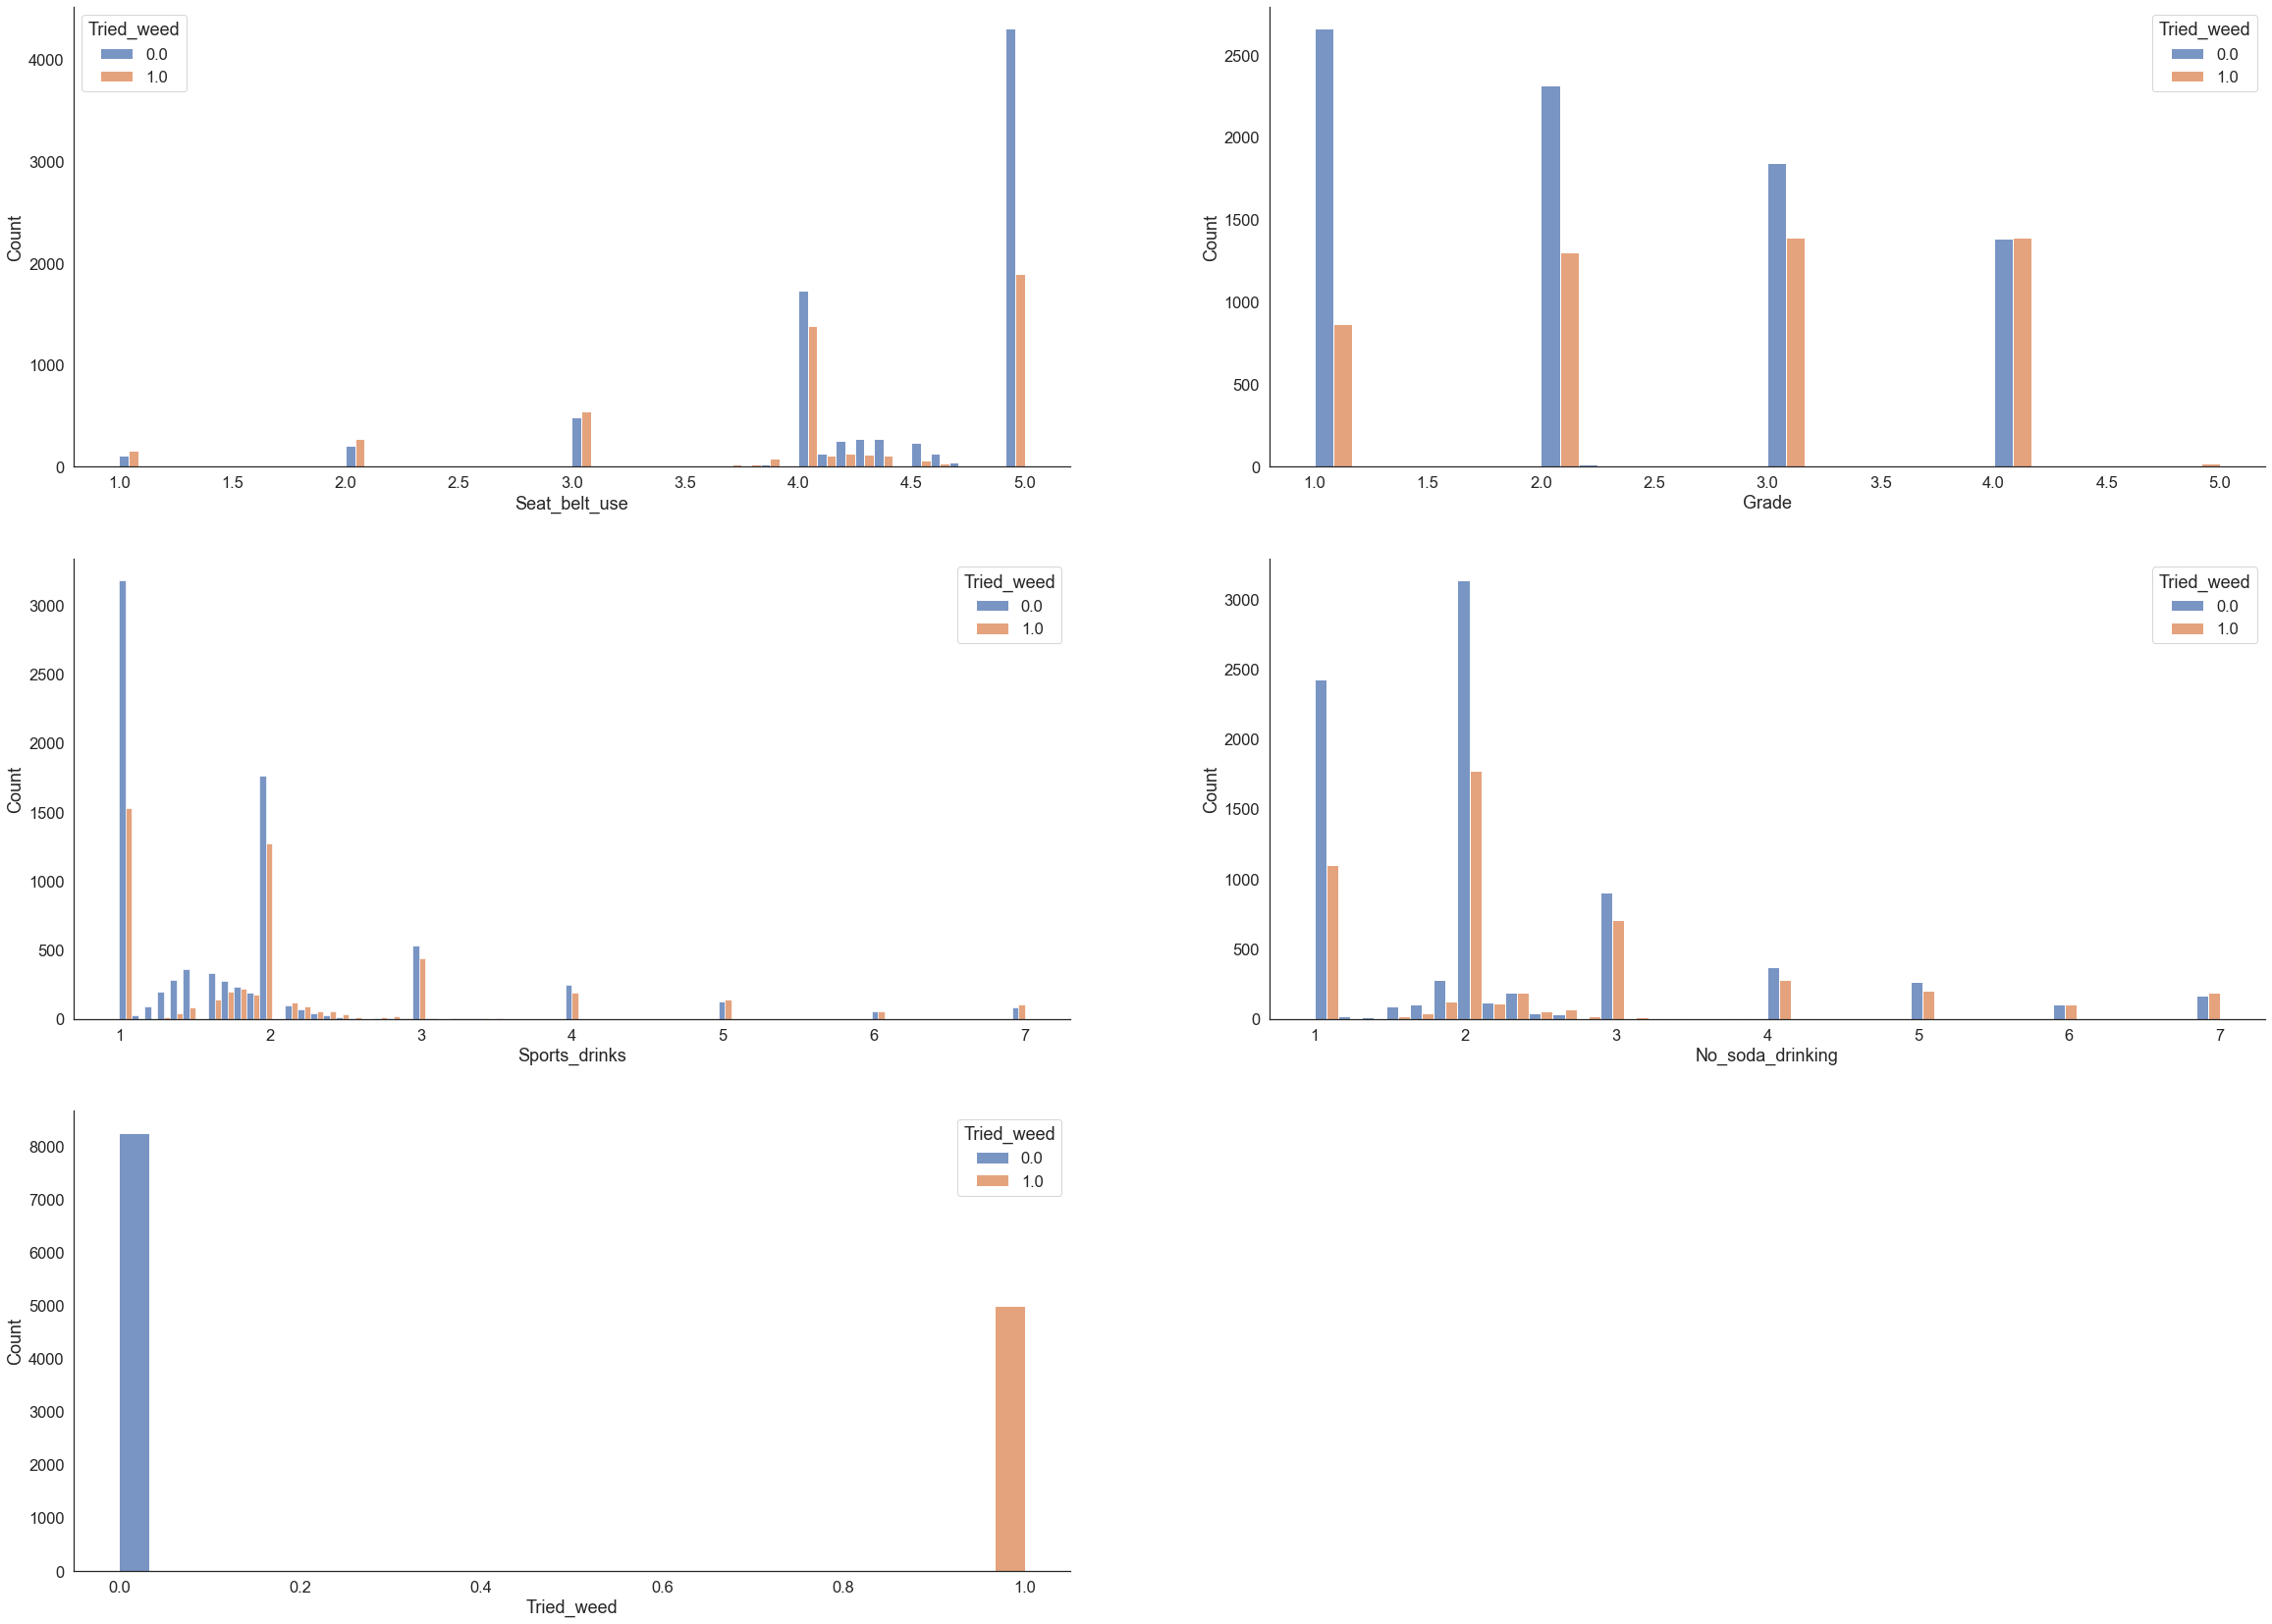

In [54]:
#display how target relate to Drugs usage
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[40,50])
for i in range(5):
    fig.add_subplot(5, 2, i+1)
    #sns.kdeplot(data=data1,x=data1.columns[i+30],hue='Tried_weed')
    sns.histplot(data=df_open_s, x=df_open_s.columns[i+1], hue='Tried_weed',multiple="dodge")
    sns.despine()
    plt.savefig('open_data.png',transparent=True, bbox_inches='tight')